# Exploratory Data Analysis

In [3]:
import pandas as pd

<h4>Step 1: loading the cleaned dataset</h4>

In [4]:
# Reading csv file using pandas library
df = pd.read_csv('cleaned_WHO_data.csv')
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,209.0,0,6.0,0
1,2020-01-12,AF,Afghanistan,EMRO,209.0,0,6.0,0
2,2020-01-19,AF,Afghanistan,EMRO,209.0,0,6.0,0
3,2020-01-26,AF,Afghanistan,EMRO,209.0,0,6.0,0
4,2020-02-02,AF,Afghanistan,EMRO,209.0,0,6.0,0
...,...,...,...,...,...,...,...,...
63780,2025-02-09,ZW,Zimbabwe,AFRO,2.0,266410,6.0,5740
63781,2025-02-16,ZW,Zimbabwe,AFRO,209.0,266410,6.0,5740
63782,2025-02-23,ZW,Zimbabwe,AFRO,0.0,266410,6.0,5740
63783,2025-03-02,ZW,Zimbabwe,AFRO,0.0,266410,6.0,5740


In [5]:
# Rechecking if there is any null values present
df.isnull().sum()

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

<h4>Step 2: Analyzing statistical information</h4>

In [20]:
# Calculating statistical measure by using inbuilt formulas

# Calculatine mean for all numerical columns
mean_c = df['New_cases'].mean()
mean_d = df['New_deaths'].mean()
mean_cc = df['Cumulative_cases'].mean()
mean_cd = df['Cumulative_deaths'].mean()
print("Mean:", mean_c, mean_d, mean_cc, mean_cd)

# Calculating median for all numerical columns
median_c = df['New_cases'].median()
median_d = df['New_deaths'].median()
median_cc = df['Cumulative_cases'].median()
median_cd = df['Cumulative_deaths'].median()
print("Median:",median_c, median_d, median_cc, median_cd)

# Calculating standard deviation
std_c = df['New_cases'].std()
std_d = df['New_deaths'].std()
std_cc = df['Cumulative_cases'].std()
std_cd = df['Cumulative_deaths'].std()
print("Standard Deviation:",std_c, std_d, std_cc, std_cd)

# Calculating range
range_c = df['New_cases'].max() - df['New_cases'].min()
range_d = df['New_deaths'].max() - df['New_deaths'].min()
range_cc = df['Cumulative_cases'].max()- df['Cumulative_cases'].min()
range_cd = df['Cumulative_deaths'].max() - df['Cumulative_deaths'].min()
print("Range:",range_c, range_d, range_cc,range_cd)

Mean: 8725.794653915498 94.72771027671082 993389.7287606804 13453.197742415929
Median: 209.0 6.0 48221.0 596.0
Standard Deviation: 76734.35159287533 643.3378509337462 2905352.7191065927 42902.3221430356
Range: 11163629.0 32414.0 26748625 630494


In [6]:
# This will print the statistical information like mean, median, standard deviation, quartiles, and soon for numerical columns.
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,6.378500e+04,6.378500e+04,63785.000000,63785.000000
mean,8.725795e+03,9.933897e+05,94.727710,13453.197742
std,7.673435e+04,2.905353e+06,643.337851,42902.322143
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000
25%,4.600000e+01,5.403000e+03,4.000000,33.000000
50%,2.090000e+02,4.822100e+04,6.000000,596.000000
75%,8.210000e+02,5.160230e+05,7.000000,6598.000000
max,1.109855e+07,2.674862e+07,28982.000000,630494.000000


<h4>Step 3: Visualizing the datasets using appropriate graphs, lines and plot depending on the nature of the datasets</h4>

In [7]:
# Importing the necessary libraries for visualization
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

<h4>Visualizing the bar chart of  average new cases and new death for respective WHO_regions</h4>

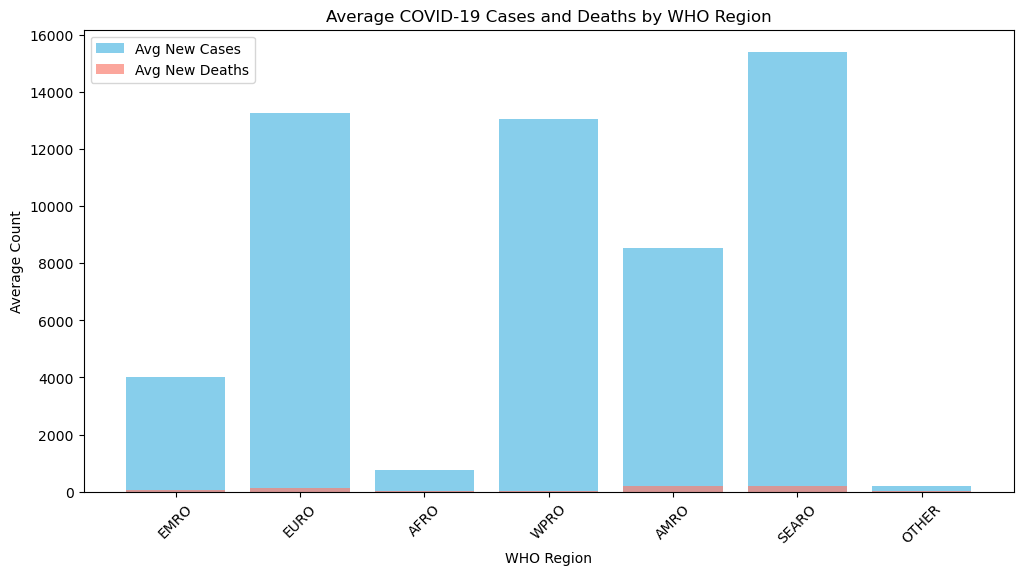

In [30]:

# Get unique WHO regions
who_regions = df['WHO_region'].unique()

# Create lists to store average new cases and deaths
avg_new_cases = []
avg_new_deaths = []

# Loop through each WHO region to calculate averages
for region in who_regions:
    region_data = df[df['WHO_region'] == region]
    avg_new_cases.append(region_data['New_cases'].mean())  # Average New Cases
    avg_new_deaths.append(region_data['New_deaths'].mean())  # Average New Deaths

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(who_regions, avg_new_cases, color='skyblue', label='Avg New Cases')
plt.bar(who_regions, avg_new_deaths, color='salmon', label='Avg New Deaths', alpha=0.7)

# Customize the plot
plt.title('Average COVID-19 Cases and Deaths by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<h4>Visualizing the Histogram and heatmap for different variables</h4>

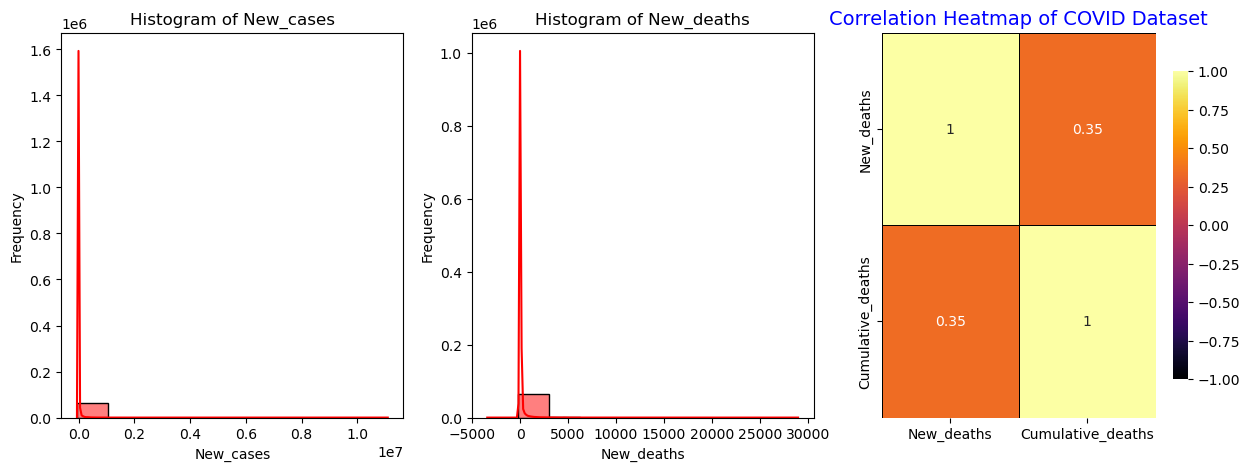

In [31]:
plt.figure(figsize=(15,5))

# Histogram(1st subplot)
plt.subplot(1,3,1)
# Rows, columns, position
sns.histplot(df['New_cases'],bins=10, kde=True, color='red')
plt.title('Histogram of New_cases')
plt.xlabel('New_cases')
plt.ylabel('Frequency')

# Histogram(2nd subplot)
plt.subplot(1,3,2)
# Rows, columns, position
sns.histplot(df['New_deaths'],bins=10, kde=True, color='red')
plt.title('Histogram of New_deaths')
plt.xlabel('New_deaths')
plt.ylabel('Frequency')

# HeatMap Coorelation(3rd subplot)
plt.subplot(1,3,3)
corr_matrix = df[['New_deaths','Cumulative_deaths']].corr()
# Create a heatmap
# Create heatmap using seaborn's heatmap() function
sns.heatmap(
    corr_matrix, # The correlation matrix
    annot=True, # Annotate each cell with the numeric value
    cmap='inferno', # Color map (coolwarm ranges from blue for low to red for high correlation)
 # try these themes for cmap: Blues, BuGn, BuPu, magma,inferno,plasma
    linewidths=0.5, # Width of the lines that will divide each cell
    linecolor='black', # Color of the lines dividing cells
    vmin=-1, # Minimum color scale value (for -1 correlation)
    vmax=1, # Maximum color scale value (for 1 correlation)
    cbar_kws={"shrink": 0.8} # Customize color bar (shrink it slightly)
)
# Title for the heatmap plot
# Change the title color to 'blue' and adjust font size
plt.title('Correlation Heatmap of COVID Dataset', color='blue',
fontsize=14)
# Show the plot
plt.show()

<h4>Visualizing the coorelation between New_deaths and Countries Using Heatmap</h4>

<Figure size 1500x500 with 0 Axes>

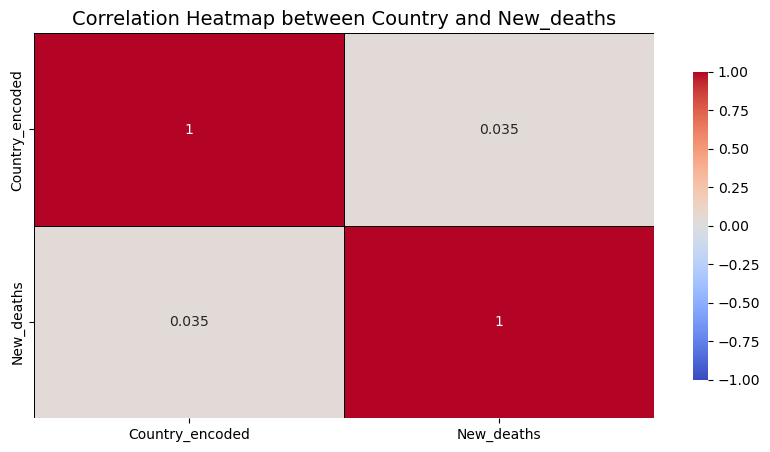

In [41]:
plt.figure(figsize=(15,5))

# calculate the mean of 'New_deaths' and group the countries with their respective means.
country_deaths = df.groupby('Country')['New_deaths'].mean().reset_index()

# 'Country' is a categorical variable here so we are encoding country column meaning we are assigning the unique numbers to each country.
country_deaths['Country_encoded'] = country_deaths['Country'].astype('category').cat.codes

# Create a correlation matrix
corr_matrix = country_deaths[['Country_encoded', 'New_deaths']].corr()

# Plot the heatmap
plt.figure(figsize=(10,5))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    linewidths=0.5, 
    linecolor='black', 
    vmin=-1, 
    vmax=1,
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Heatmap between Country and New_deaths', fontsize=14)
plt.show()

<h4>Visualizing the coorelation between New_cases and Countries Using Heatmap</h4>

<Figure size 1500x500 with 0 Axes>

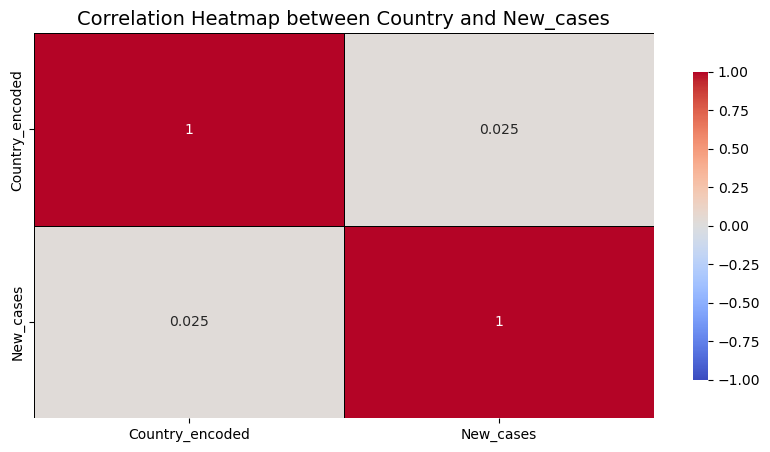

In [42]:
plt.figure(figsize=(15,5))

# # calculate the mean of 'New_cases' and group the countries with their respective means.
country_deaths = df.groupby('Country')['New_cases'].mean().reset_index()

# 'Country' is a categorical variable here so we are encoding country column meaning we are assigning the unique numbers to each country
country_deaths['Country_encoded'] = country_deaths['Country'].astype('category').cat.codes

# Create a correlation matrix
corr_matrix = country_deaths[['Country_encoded', 'New_cases']].corr()

# Plot the heatmap
plt.figure(figsize=(10,5))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    linewidths=0.5, 
    linecolor='black', 
    vmin=-1, 
    vmax=1,
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Heatmap between Country and New_cases', fontsize=14)
plt.show()